# Ministry of Culture

### General information

**Research customer** — Ministry of Culture of the Russian
Federation.
We need to study the Russian film distribution market and identify current trends, pay attention to movies that have received state support.

I will work with data published on the portal of open
data from the Ministry of Culture. The dataset contains information about
rental certificates, fees and government support
films, as well as information from the KinoPoisk website.

**Data info:**
* `title` - movie title;
* `puNumber` — rental certificate number;
* `show_start_date` - movie premiere date;
* `type` - movie type;
* `film_studio` - production studio;
* `production_country` - country of origin;
* `director` — director;
* `producer` - producer;
* `age_restriction` - age category;
* `refundable_support` — amount of state support refundable funds;
* `nonrefundable_support` - the amount of non-refundable state support funds;
* `financing_source` - source of government funding;
* `budget` - the total budget of the movie;
* `ratings` — movie rating on KinoPoisk;
* `genres` - movie genre;
* `box_office` — fees in rubles.

## Step 1. Explore the data

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)

movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
box_office = pd.read_csv('/datasets/mkrf_shows.csv')
box_office.sample(5)

,puNumber,box_office
2661,124000916,1293483.00
435,111009216,3300.00
1997,121021514,385450.00
67,111001311,200.00
978,121001516,16269205.58


In [89]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [90]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [91]:
movies[movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
movies.loc[(movies['puNumber'] == 'нет'), 'puNumber'] = 0
movies['puNumber'] = pd.to_numeric(movies['puNumber'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [93]:
#let's match the tables
movies = movies.merge(box_office, on='puNumber', how='outer')
movies.sample()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2464,Наваждение (2015),126002815,2015-09-11T12:00:00.000Z,Прочие,"Джугсоу Продакшнз, Скай Атлантик, Эйч Би Оу До...",США,Алекс Гибни,"Кристин Ваурио, Алекс Гибни, Лоуренс Райт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,документальный,1954807.00


In [94]:
#проверим, получилось ли у нас совместить таблицы
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Great, the data is collected correctly, the `box_office` column has joined in full

In [95]:
movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7486.00,332.00,332.00,332.00,3158.00
mean,135178527.64,11864457.83,48980988.89,127229716.68,76478696.16
std,38382177.41,24916555.26,59980117.92,188588333.12,240353122.82
min,0.00,0.00,0.00,0.00,0.00
25%,112025043.00,0.00,25000000.00,42000000.00,86239.00
50%,121015464.50,0.00,30000000.00,68649916.00,2327987.55
75%,124003313.75,15000000.00,40375000.00,141985319.50,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,3073568690.79


**Conclusion**
We have 16 columns in the table, there are gaps, and the data in some of the gaps does not correspond to reality, we will need to deal with this in preprocessing and correct the table.

## Step 2. Data preprocessing

In [96]:
#we have almost no incorrect names, the only thing I would change is the name of the rental certificate number
movies.rename(columns = {'puNumber':'pu_number'}, inplace=True)
movies.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [97]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [98]:
#change the data type in the show_start_date column to a date
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
movies.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4047,Супруги Морган в бегах,221007510,2010-02-05 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Рилетивити Медиа, Кэстл Рок ...",США,Марк Лоуренс,"Лиз Глотцер, Мартин Шэфер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.6,"драма,мелодрама,комедия",NaN


In [99]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In the `type` column we have two duplicates, they are related to a space in the value, let's fix it

In [100]:
movies['type'] = movies['type'].str.strip()
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [101]:
#here it's good
movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [102]:
movies['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

In [103]:
movies['refundable_support'].isna().sum()

7154

In [104]:
movies['nonrefundable_support'].unique()

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07, 3.00000000e+07, 4.00000000e+07,
       2.30000000e+07, 4.50000000e+07, 5.65790550e+07, 2.55000000e+07,
       2.75100000e+07, 1.00000000e+07, 2.40000000e+07, 2.45000000e+07,
       2.70000000e+07, 5.00000000e+06, 9.00000000e+07, 2.00000000e+07,
       7.00000000e+07, 9.70000000e+07, 2.44500000e+07, 5.00000000e+07,
       0.00000000e+00, 6.00000000e+07, 2.75000000e+07, 2.69500000e+07,
       1.10000000e+08, 1.50000000e+07, 5.90000000e+07, 2.50000000e+08,
       3.70000000e+07, 3.50000000e+07, 2.01452850e+07, 2.59000000e+07,
       6.00000000e+06, 3.92104482e+08, 2.52000000e+07, 2.29040000e+07,
       2.90000000e+07, 5.10000000e+07, 4.70000000e+06, 5.30000000e+06,
       2.17000000e+07, 2.49860000e+07, 2.53450000e+07, 1.33000000e+08,
       1.75000000e+08, 3.01239150e+07, 2.85000000e+07, 3.00000000e+08,
      

In [105]:
movies['nonrefundable_support'].isna().sum()

7154

On the issue of financing, we have the same lack of data, unfortunately we cannot fill it up, besides, the number is very large, so we will leave the data as it is and see how it goes on

In [106]:
movies['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [107]:
movies['financing_source'].isna().sum()

7154

It's the same here, which is obvious, if we don't know who financed, we don't know how much they contributed. Passes are the same

In [108]:
movies['budget'].unique()

array([           nan, 7.94119000e+07, 3.71428570e+07, 1.76023490e+08,
       4.05741400e+07, 4.00151220e+07, 5.18500000e+07, 2.20588394e+08,
       8.62100670e+07, 1.39551503e+08, 4.85714300e+07, 8.00000000e+07,
       3.62595000e+07, 7.08761720e+07, 2.52489571e+08, 7.49100000e+07,
       0.00000000e+00, 8.97823120e+07, 4.36437176e+08, 4.05000000e+07,
       6.84906060e+07, 4.50066090e+07, 1.31000000e+08, 5.00000000e+08,
       6.10114070e+07, 4.00000000e+07, 3.73712620e+07, 3.52969500e+07,
       4.30000000e+07, 7.74017510e+07, 3.50000000e+07, 5.11967110e+07,
       9.01200000e+07, 2.67288892e+08, 4.92804960e+07, 4.90714280e+07,
       4.69688830e+07, 5.51950000e+07, 1.56360666e+08, 3.74247960e+07,
       3.57600600e+07, 2.81155800e+07, 3.79436520e+07, 1.38325738e+08,
       4.22525090e+07, 3.99900000e+07, 1.12000000e+08, 5.57294240e+07,
       3.57142860e+07, 1.39357211e+08, 5.02187410e+07, 4.02650000e+07,
       3.90579710e+07, 9.25000000e+07, 4.14978600e+07, 8.62363940e+07,
      

In [109]:
movies['budget'].isna().sum()

7154

The number of gaps in the budget coincides with the gaps in state support, which is quite interesting, because films are not always sponsored by the state, it can be private investors

In [110]:
movies['box_office'].unique()

array([           nan, 2.70000000e+03, 3.60000000e+02, ...,
       3.14379050e+06, 1.80017724e+07, 2.19569000e+05])

In [111]:
movies['box_office'].isna().sum()

4328

The fees also have a fairly large number of passes: there are many sites that do not collect money for films, these are free streaming sites, pirated sites or services where payment is made by subscription, so there is no data on fees in such cases.

In [112]:
movies['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [113]:
movies['genres'].isna().sum()

976

In the `genres` column, we have quite a few gaps, it will take a very long time to search for each of them on the Internet, but they will not affect our further analysis so much. I suggest replacing them with something neutral

In [114]:
movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [115]:
movies['production_country'].isna().sum()

2

In [116]:
movies[movies['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.00
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


We have only two gaps in this column, but I would leave them in place so as not to confuse further analysis of the data, because they contain some important data.

In [117]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [118]:
movies.duplicated().sum()

0

In [119]:
movies.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In general, we have quite a lot of gaps, but most of them are difficult to fill, so I leave the columns of fees, producer, rating, budget, genres, country, studio and director as they are (The data can be found on the Internet, but it will take a very long time)
Columns with government funding, as well as the source - most likely these films did not receive government funding.
The only thing, I will fill in the categorical columns, put the value "not defined" there

In [120]:
movies.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5780,Каникулы Президента,111002018,2018-03-21 12:00:00+00:00,Художественный,"ООО ""Андрианова кино""",Россия,И.Шерстобитов,"О.Андрианова, И.Шерстобитов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,комедия,44401434.60


In [121]:
movies['film_studio'] = movies['film_studio'].fillna('not defined')
movies['production_country'] = movies['production_country'].fillna('not defined')
movies['director'] = movies['director'].fillna('not defined')
movies['producer'] = movies['producer'].fillna('not defined')
movies['genres'] = movies['genres'].fillna('not defined')
movies.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                      0
box_office               4328
dtype: int64

We will not fill in the rest of the gaps, as I explained earlier, they will not interfere with the analysis, and we are unlikely to be able to find a good replacement for them.

In [122]:
movies['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [123]:
movies['director'].isna().sum()

0

In [124]:
movies['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'not defined',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [125]:
movies['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [126]:
#duplicates check
movies['title'].value_counts()

День святого Валентина_                               5
Шерлок Холмс                                          4
Жена путешественника во времени                       4
Начало_                                               4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
                                                     ..
Братья Медведи: Тайна трёх миров                      1
Малхолланд Драйв                                      1
Гениальный папа                                       1
Киллер поневоле                                       1
Пеле: Рождение легенды                                1
Name: title, Length: 6772, dtype: int64

In [127]:
movies[movies['title'] == 'День святого Валентина_']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


In [128]:
movies['pu_number'].value_counts()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: pu_number, Length: 7484, dtype: int64

In [129]:
movies[movies['pu_number'] == 221054410]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


I brought out an example of one of the duplicates, it is obvious that in the rest the data will be approximately the same. We can’t call it duplicates - yes, all the data from the title to the genre are the same, but if you look closely, the premiere date is different, most likely this is due to the fact that in cinemas and at different venues this film was released at different times, days, months. We can say the same about all subsequent implicit duplicates, there are definitely no errors here.

I also noticed that in many categorical columns there are implicit duplicates: for example, everything matches except for the age category, or the name is translated from English in a different way. As I explained earlier, everything is connected with different rentals, so we will not classify them as duplicates either.

However, we do have a problem with categorical columns:
- Such data should indicate to us the category of data in the story, so that it would be easier for us to deal with them. Many columns have more than 1 category, and the data is written there separated by commas, so it is more difficult to deal with such data. Columns with this problem: `genres`, `producer`, `production_country `, `film_studio`. Which columns do not have this problem: `title`, `pu_number`, `type`, `director`, `age_restriction`, `financing_source`.

In [130]:
#вот тут у нас все напуталось
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [131]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [132]:
movies['ratings'] = movies['ratings'].str.replace('%', '').astype(float)
movies.loc[movies['ratings'] > 10, 'ratings'] = movies.loc[movies['ratings'] > 10, 'ratings'] / 10
movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [133]:
movies[movies['refundable_support'] > 0].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,not defined,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70
1987,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.00,30000000.00,80000000.00,Фонд кино,5.00,"семейный,комедия",121225633.80
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,30000000.00,40000000.00,252489571.00,Фонд кино,6.50,"мультфильм,фэнтези,приключения",313489846.50
2142,Территория,111000515,2015-01-27 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,30000000.00,30000000.00,500000000.00,Фонд кино,6.80,"детектив,фэнтези,триллер",72578317.40
2288,12 месяцев. Новая сказка,111014414,2014-10-16 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Никола-фильм"", ООО ""Инвестмен...",Россия,Д.Елеонский,И.Каленов,«0+» - для любой зрительской аудитории,15000000.00,5000000.00,90120000.00,Фонд кино,3.80,"семейный,фэнтези",32244810.00


In [134]:
movies['refundable_support'].describe()

count         332.00
mean     11864457.83
std      24916555.26
min             0.00
25%             0.00
50%             0.00
75%      15000000.00
max     180000000.00
Name: refundable_support, dtype: float64

<AxesSubplot:>

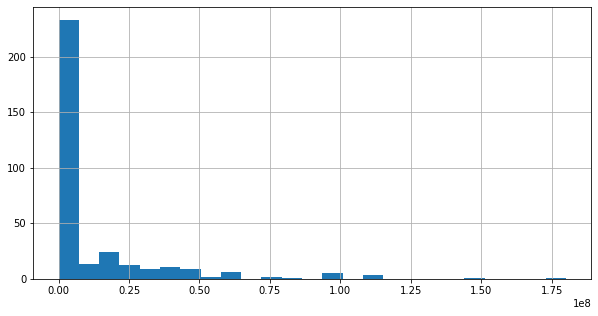

In [135]:
movies['refundable_support'].hist(bins=25, figsize=(10, 5))

In [136]:
movies['nonrefundable_support'].describe()

count         332.00
mean     48980988.89
std      59980117.92
min             0.00
25%      25000000.00
50%      30000000.00
75%      40375000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

<AxesSubplot:>

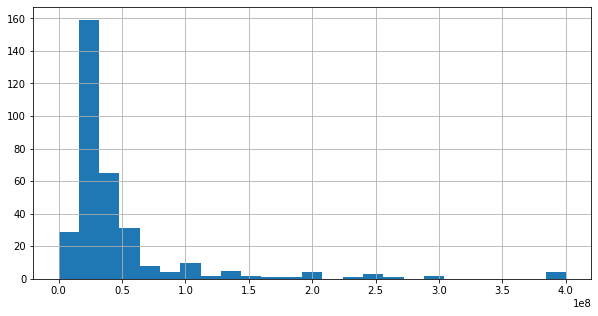

In [137]:
movies['nonrefundable_support'].hist(bins=25, figsize=(10, 5))

In [138]:
movies['budget'].describe()

count          332.00
mean     127229716.68
std      188588333.12
min              0.00
25%       42000000.00
50%       68649916.00
75%      141985319.50
max     2305074303.00
Name: budget, dtype: float64

<AxesSubplot:>

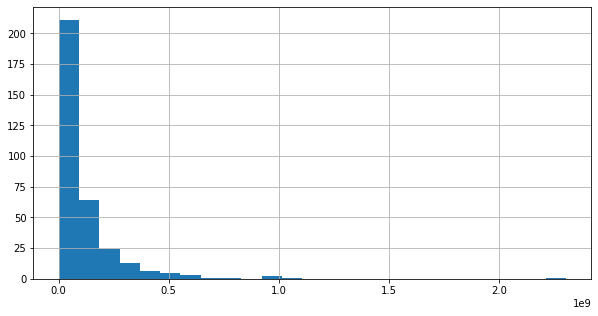

In [139]:
movies['budget'].hist(bins=25, figsize=(10, 5))

In [140]:
movies['box_office'].describe()

count         3158.00
mean      76478696.16
std      240353122.82
min              0.00
25%          86239.00
50%        2327987.55
75%       23979671.02
max     3073568690.79
Name: box_office, dtype: float64

<AxesSubplot:>

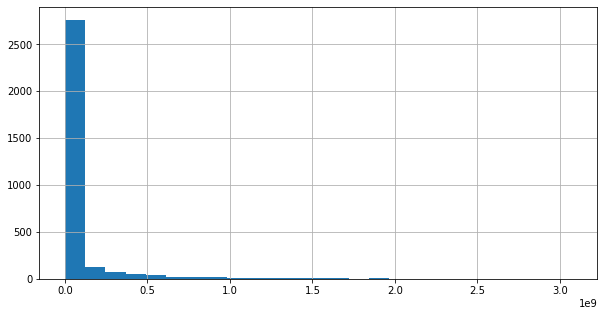

In [141]:
movies['box_office'].hist(bins=25, figsize=(10, 5))

- `refundable_support`: Basically, our refundable support values are around 11-12 million rubles, despite this, there are also very suspicious values, such as 180 million rubles. I wonder if the film managed to recoup such an amount. In general, we have rather chaotically jumping values on the graph, for example, 100 million, or 70 million. Sharp elevations
- `nonrefundable_support`: Here the bulk of the money is up to 50 million rubles, then there is a decrease and then emissions. Emissions are also quite chaotic, for example, the maximum amount of non-refundable support is 400 million rubles. I wonder how the owner of the film was able to knock out such an amount, the same emissions we have going from 150 million to 300
- `budget`: The budget is also an interesting story. Basically, films collect up to 500 million rubles of the budget. Nevertheless, one got confused and invested 2 billion 300 million rubles in the film. Quite a lot for a movie. A movie like this deserves an Oscar nomination.
- `box_office`: We'll talk about cash receipts from films a little later, but I want to note that films generally collect up to 500-700 million rubles. Despite this, we have a couple of films, the directors of which very pleasantly surprised the audience and hit the jackpot, for example, the largest fees amounted to 3 billion rubles. We also have smaller, but also quite attractive amounts: from 1 to 2 billion rubles

In [142]:
movies[movies['budget']>(movies['refundable_support']+movies['nonrefundable_support'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,not defined,28140.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN


In [143]:
movies[movies['budget']<(movies['refundable_support']+movies['nonrefundable_support'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


Interesting patterns:
- Reimbursable support is allocated much less than non-refundable
- The figures of the budget greatly exceed the data on state support. Earlier, I wrote that the gaps in this data are strange, since not all films are sponsored only by the state. But here it is clear that apparently the budget data is not given to all films, and the total budget of films often exceeds state support.
- Looking at the column of the budget, I wanted to check it. The description says that the `budget` column includes the full amount of government support. Nevertheless, I found 17 lines in which the budget is 0, and the state still allocated money. Here we clearly have a small error in the data. It is also worth noting that many films are sponsored by other sources, as it often happens when the budget exceeds state support.

In [144]:
movies['ratings'].describe()

count   6519.00
mean       6.49
std        1.11
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.90
Name: ratings, dtype: float64

<AxesSubplot:>

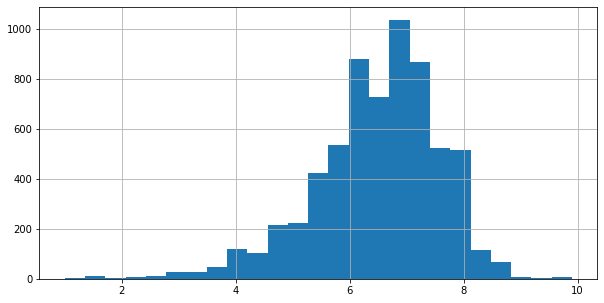

In [145]:
movies['ratings'].hist(bins=25, figsize=(10,5))

Our rating of films is on average 6.49. A very neutral number. However, we also have suspicious values, such as a rating `9.9`, which is very rare for movies. Maybe a mistake, or maybe the movie is really that cool. We also have small values from 1 to 4, such ratings are also quite rare, given that the rating is general. It would be worth checking this data, it may be false


Let's add new columns

In [146]:
#year column
movies['show_start_year'] = movies['show_start_date'].dt.year
movies.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
3405,Суперстюард,121035716,2016-12-30 12:00:00+00:00,Художественный,Найт энд Дэй Пикчерз,США,Сэм Фридлендер,"Тед Кребер, Марк Фойерстин, Сэм Фридлендер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.50,"фэнтези,драма,мелодрама",356884.00,2016


In [147]:
#main director and genre
def main_data(cell_value):
    return cell_value.split(',')[0]

movies['main_director'] = movies['director'].apply(main_data)
movies['main_genres'] = movies['genres'].apply(main_data)
movies.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres
2132,Битва за Севастополь,111001415,2015-02-20 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+» - для детей старше 12 лет,0.00,27510000.00,131000000.00,Министерство культуры,7.50,"биография,военный,драма",401804461.90,2015,С.Мокрицкий,биография


In [148]:
#Let's calculate the share of the statebudget from the total and add
movies['percent_of_budget'] = (movies['refundable_support']+movies['nonrefundable_support'])/movies['budget']
movies[movies['percent_of_budget'] > 0].sample()                                                

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,percent_of_budget
5870,Кислота,111004818,2018-06-07 12:00:00+00:00,Художественный,"ООО ""Студия ""СЛОН""",Россия,А.Горчилин,С.Еремеева,«18+» - запрещено для детей,0.00,25000000.00,37600000.00,Министерство культуры,6.20,драма,21522348.20,2018,А.Горчилин,драма,0.66


# Step 3: Exploratory Data Analysis

### Look at how many films were released each year. Calculate the share of films with the specified information about rental in cinemas

For rental, I will consider those films that raised money after the release, because if the film was not released, then they did not earn any money on it either

In [149]:
year_rating = movies[['box_office', 'show_start_year']]
filter_rating = year_rating['box_office'] > 0
year_rating = year_rating.loc[filter_rating]
year_rating

,box_office,show_start_year
6,2700.00,2013
18,360.00,2016
19,420.00,2016
22,380.00,2013
38,1165.00,2013
...,...,...
7464,717703185.53,2019
7466,501069235.00,2019
7471,3143790.50,2019
7472,18001772.43,2019


In [150]:
only_year_rating = year_rating['show_start_year'].value_counts()
only_year_rating

2019    530
2016    525
2018    475
2015    462
2017    357
2014    273
2013    179
2012    123
2011    109
2010    101
Name: show_start_year, dtype: int64

Text(0, 0.5, 'Movies count')

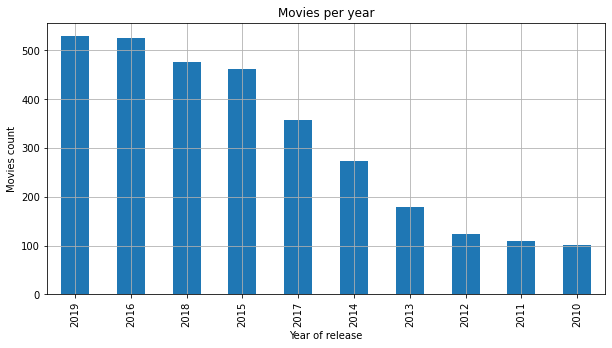

In [151]:
only_year_rating.plot(kind='bar', grid = True, figsize = (10, 5))
plt.title('Movies per year')
plt.xlabel('Year of release')
plt.ylabel('Movies count')

### Learn how rental dynamics have changed over the years. In what year was the minimum amount collected? And the maximum?

Text(0, 0.5, 'Collected amount')

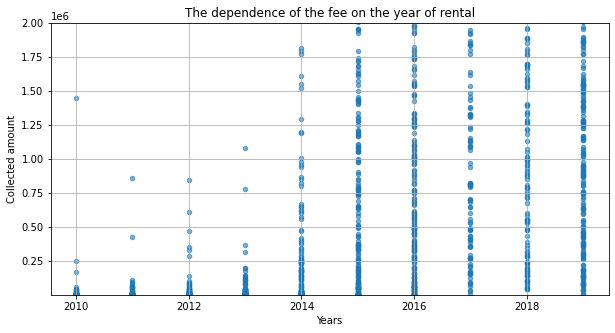

In [152]:
mp = movies[['show_start_year', 'box_office', 'age_restriction']]
mp.plot(x='show_start_year', y='box_office',  kind='scatter', ylim = (5, 2000000), alpha=0.6,grid = True, figsize = (10, 5))
plt.title('The dependence of the fee on the year of rental')
plt.xlabel('Years')
plt.ylabel('Collected amount')

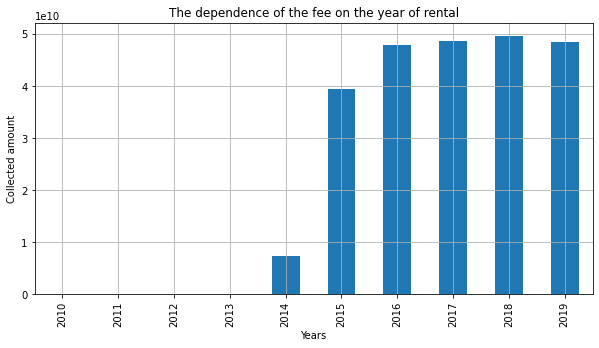

In [153]:
movies.groupby('show_start_year')['box_office'].sum().plot(
    x = 'show_start_year', y = 'box_office', kind = 'bar', grid = True, figsize = (10,5)
)
plt.title('The dependence of the fee on the year of rental')
plt.xlabel('Years')
plt.ylabel('Collected amount')
plt.show()

On the graph, we can see how the amount of fees changes in each year. The most successful year turned out to be 2018, while from 2010 to 2013 the fees are minimal. I would also like to note that a noticeable increase in the box office began in 2014 and continued until 2018, in 2019 the situation began to decline, but not much, 2019 still won all the previous ones.

I think that such a sharp increase in 2014 may be due to the collapse of the ruble, then all prices rose and rise to this day, therefore, in comparison with previous years, it seems that an order of magnitude more was earned

### Use the pivot table to calculate the average and median fees for each year

In [154]:
box_office_pivot = mp.pivot_table(index='show_start_year', values='box_office')
box_office_pivot.sort_values(by='box_office')

,box_office
show_start_year,
2010,23130.04
2012,54339.24
2011,129383.17
2013,161954.92
2014,26684415.27
2015,84940570.31
2016,91000569.85
2019,91369261.85
2018,104565059.23


Text(0, 0.5, 'Amount')

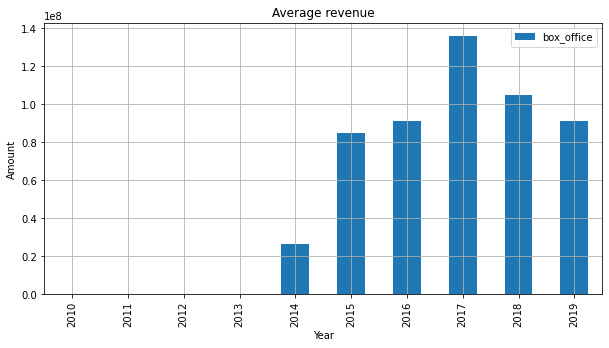

In [155]:
box_office_pivot.plot(kind='bar', grid = True, figsize = (10, 5))
plt.title('Average revenue')
plt.xlabel('Year')
plt.ylabel('Amount')

In [156]:
box_office_pivot_mean = mp.pivot_table(index='show_start_year', values='box_office', aggfunc='median')
box_office_pivot_mean.sort_values(by='box_office')

,box_office
show_start_year,
2010,1700.00
2011,3000.00
2013,3522.50
2012,5660.00
2014,18160.00
2016,3846679.41
2019,4627798.34
2015,4920933.00
2018,8891102.21


Text(0, 0.5, 'Amount')

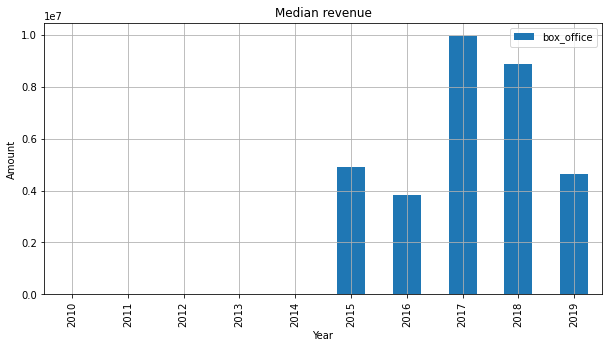

In [157]:
box_office_pivot_mean.plot(kind='bar', grid = True, figsize = (10, 5))
plt.title('Median revenue')
plt.xlabel('Year')
plt.ylabel('Amount')

After analyzing the tables, we can conclude that the highest median and average price belongs to 2017. The graphs show that our smallest figures still belong to 2010-2013, but the median amount of fees is also minimal in 2014 - only 18,160.

I think that such a difference in the amounts in the average and median values ​​can be explained by an increase in cinema attendance. The average value shows us the average of the whole cisle in general, which means that the amounts received for this year were larger, besides, perhaps many more people went to the cinema or bought films, hence the average is larger. In 2017, probably not so many people went to cinemas and films were not as affordable, and the price per film was much higher than in subsequent years, as the graph shows.

### Determine if the age limit of the audience (“6+”, “12+”, “16+”, “18+”, etc.) affects the box office of the film in the period from 2015 to 2019? Films with which age limit have collected the most money at the box office? Does the picture change depending on the year? If yes, what could be the reason for this?

In [158]:
mp = mp.loc[mp['show_start_year'] > 2014]
mp.sample()

,show_start_year,box_office,age_restriction
3480,2017,941788.00,«0+» - для любой зрительской аудитории


In [159]:
year_mp = mp.pivot_table( index='show_start_year', columns='age_restriction', values='box_office',
                         aggfunc='sum')
year_mp

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41
2019,17746066.82,12680198773.67,12753418984.60,10121796303.64,12852548650.86


Text(0, 0.5, 'Revenue')

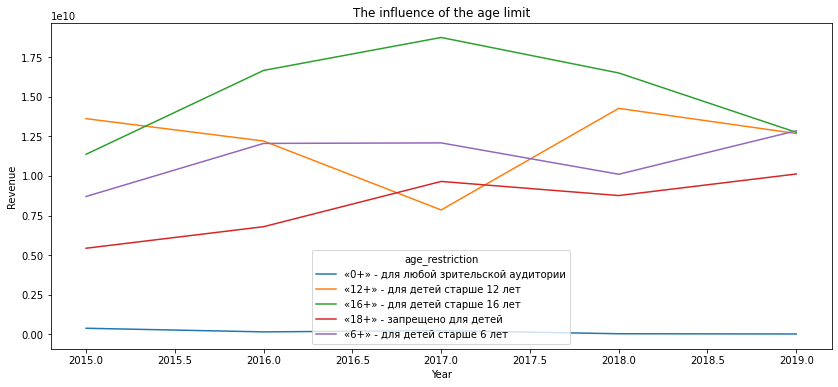

In [160]:
year_mp.plot(figsize = (14,6))
plt.title('The influence of the age limit')
plt.xlabel('Year')
plt.ylabel('Revenue')

This graph perfectly reflects the situation, I will go in ascending order:
* Films 0+ have the lowest fees. I can assume that this is due to the fact that such films (or rather cartoons) are produced exclusively for small children who sometimes do not like going to the cinema, or parents do not have the time and desire to spend time and money on this.
* The following films in our rating are 18+. This is most likely due to the fact that mostly teenagers go to the cinema, and they are not allowed in, and people 18+ simply do not have time for cinema, or many prefer to watch such films in a more intimate setting at home.
* Further we have films 12+ and 6+. They both deserve 2nd place. The fact is that there are quite a lot of films in these categories, many family films and cartoons are released every year, which, as a rule, the whole family with children go to, so more tickets are bought. Plus it's a great time to spend with your family.
* An the winners are movies with a 16+ limit. They deserve 1st place. And this is not surprising. There are probably most films with this limitation, so teenagers willingly go to them, they have an interesting plot that will suit the majority.

# Step 4: Research Films That Have Received Government Support

### How much money is allocated to support cinema

In [161]:
movies.sample()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,percent_of_budget
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.70,"аниме,мультфильм,фантастика",0.00,2012,Мамору Хосода,аниме,NaN


In [162]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [163]:
movies['refundable_support'].describe()

count         332.00
mean     11864457.83
std      24916555.26
min             0.00
25%             0.00
50%             0.00
75%      15000000.00
max     180000000.00
Name: refundable_support, dtype: float64

(0.0, 180000000.0)

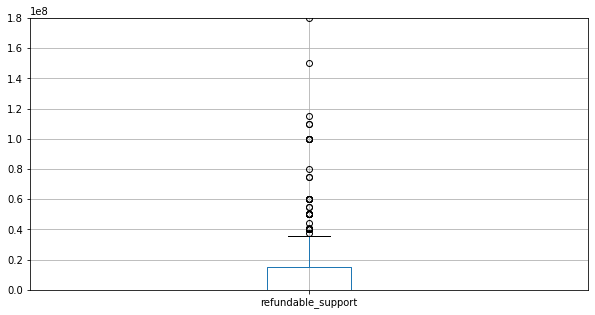

In [164]:
movies.boxplot(column = 'refundable_support', figsize=(10, 5))
plt.ylim(0, 180000000)

Text(0.5, 1.0, 'refundable support')

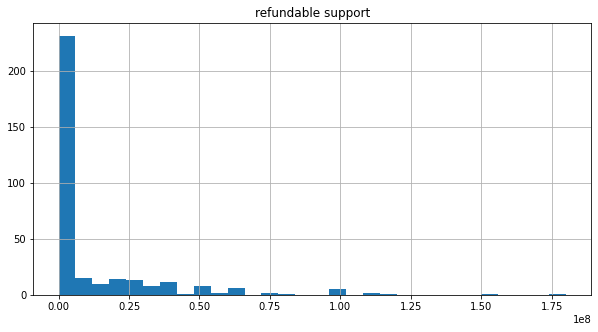

In [165]:
movies['refundable_support'].hist(bins = 30, figsize=(10,5))
plt.title('refundable support')

In [166]:
movies['nonrefundable_support'].describe()

count         332.00
mean     48980988.89
std      59980117.92
min             0.00
25%      25000000.00
50%      30000000.00
75%      40375000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

(0.0, 400000000.0)

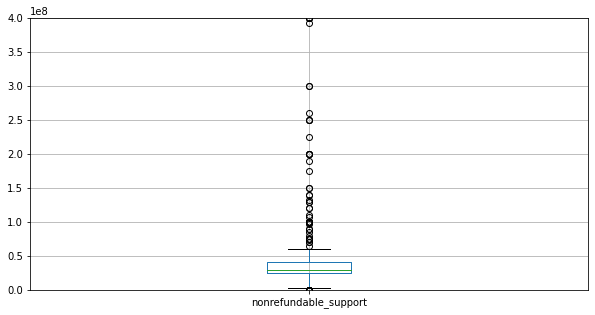

In [167]:
movies.boxplot(column = 'nonrefundable_support', figsize=(10,5))
plt.ylim(0, 400000000)

Text(0.5, 1.0, 'nonrefundable support')

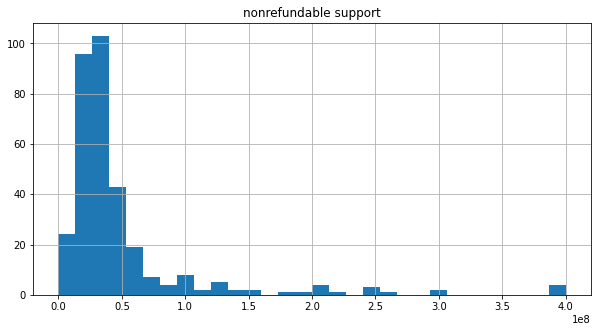

In [168]:
movies['nonrefundable_support'].hist(bins = 30, figsize=(10, 5))
plt.title('nonrefundable support')

Thus, we can conclude that only 332 studios received state support, which is a small percentage of films, approximately 5%.
- There are much more non-refundable funds than refundable ones.
- The maximum number of films receive about 20 million rubles of refundable funds, while the state generally allocates about 25 million rubles of non-refundable funds.
- There are also outlier values reaching up to 180 million refundable and 400 million non-refundable funds.

### Do such films pay off well, what is their rating

In [86]:
rich_movies = movies[(movies['box_office']/movies['budget']) > 1]
rich_movies

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,percent_of_budget
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,not defined,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,2015,Р.Давлетьяров,драма,0.68
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,А.Войтинский,триллер,0.54
1987,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.00,30000000.00,80000000.00,Фонд кино,5.00,"семейный,комедия",121225633.80,2014,Максим Свешников,семейный,0.70
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,30000000.00,40000000.00,252489571.00,Фонд кино,6.50,"мультфильм,фэнтези,приключения",313489846.50,2014,А.Цицилин,мультфильм,0.28
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,2014,А.Зайцев,мелодрама,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6972,Верность,111009119,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""1-2-3 Продакшн""",Россия,Н.Сайфуллаева,"С.Корнихин, В.Федорович, Е.Никишов, П.Лилиенфе...",«18+» - запрещено для детей,0.00,30000000.00,46300000.00,Министерство культуры,6.20,драма,97637352.29,2019,Н.Сайфуллаева,драма,0.65
6991,Давай разведемся!,111009519,2019-06-12 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Пармас,"С.Сельянов, К.Эрнст, Н.Дрозд-Макан",«12+» - для детей старше 12 лет,0.00,25000000.00,38000000.00,Министерство культуры,5.90,комедия,103098290.54,2019,А.Пармас,комедия,0.66
7453,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,80000000.00,40000000.00,270000000.00,Фонд кино,7.50,"мультфильм,детский,приключения",387590521.72,2019,В.Бедошвили,мультфильм,0.44
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,Фонд кино,6.80,комедия,3073568690.79,2019,К.Шипенко,комедия,0.38


Text(0.5, 1.0, 'Payback films')

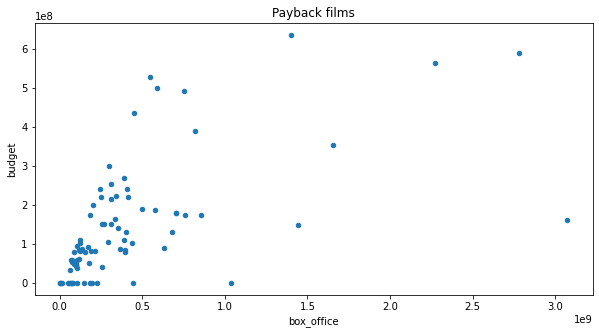

In [169]:
rich_movies.plot(x='box_office', y='budget', kind='scatter', figsize=(10, 5))
plt.title('Payback films')

In [170]:
rich_movies['ratings'].describe()

count   81.00
mean     6.07
std      1.06
min      2.90
25%      5.20
50%      6.20
75%      6.80
max      8.50
Name: ratings, dtype: float64

Text(0.5, 1.0, 'Payback films rating')

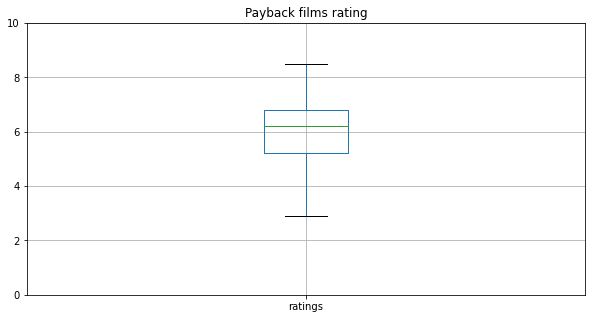

In [171]:
rich_movies.boxplot(column = 'ratings', figsize=(10, 5))
plt.ylim(0, 10)
plt.title('Payback films rating')

### Conclusions
- There are very few films that pay off, only 83. To present the data, I used data on the budget and funds raised of films.
- The rating of these films reaches the maximum rating of 9.4 points, however, this is an outlier. Most films are kept in the 5-7 marks.


# General conclusion

We have done a great job of analyzing the films of the Ministry of Culture of the Russian Federation. Based on the data, we can now make a general conclusion:

**We have analyzed and pre-processed the data itself:**
- Changed the name of one of the columns
- Changed gaps in categorical data to "Undefined"
- Converted data where needed
- Added a couple of new columns that helped us with data analysis

**What patterns did we find:**

- There are quite a few implicit duplicates in the data. All data is the same in them, except for some columns. As I assumed, such lines are not duplicates, they were probably released in different rentals, at different times, on different sites, so we cannot classify them as duplicates
- We found a problem in categorical data: Values ​​are written separated by commas, which means we cannot analyze and categorize such data
- There are also quite a few missing values ​​in the data, for example, related to budget and money. We would also not be able to replace such passes, due to the fact that not all films are sponsored by the state, and publicly this data cannot be found and replaced, because they simply do not exist anywhere. Putting the median value there is incorrect and impossible
- There are probably small errors in the data, since the budget data in our 17 lines shows `0`, while state support was indicated. The description says that the budget includes state support.
- There are data in the ratings that are worth checking, there are films whose rating is from 1 to 4, which is rather strange, because the rating is general for the film, there may be a problem with the service showing the film

**Data analysis:**

- The fee increases every year. The most profitable year was 2018. From 2010 to 2013, the amount of fees was minimal, in 2014 a sharp increase began. I think this is due to the collapse of the ruble in 2014, which is growing to this day, which is why the amount of fees has increased.
- Nevertheless, the median and average box office figures were the highest in 2017, which we explained by the fact that the price per film in 2017 was higher, and the availability of films was lower, respectively, the median and high. The year 2010-2013 continues to remain with us on the podium in the antitope.
- Films that collect the highest fees are limited to 16+. This is not surprising, because this is perhaps the most common restriction for films with an interesting plot for people who have the opportunity to go to the cinema: adults and teenagers. Next come films 12+, 6+ and 18+. The minimum fees belong to films with a 0+ limit.
- After analyzing films with state support, we saw that only 332 studios received it - which is only 5% of the total. Non-returned funds were given in larger volumes than returned ones. So most of the films received 20 million rubles, and non-refundable - about 25 million rubles. The maximum support was allocated 180 million rubles of repayable funds and 400 million non-refundable.
- Among all the films, there were not so many that paid off - only 83. The rating of such films fluctuates around 5-7 points, however, there are those who deserve up to 9.4 points, but, unfortunately, this is just an outlier